## 4. Przybliżone całkowanie

### 4.1. Ogólny wzór

Definicja 4.1 (Kwadratura). Niech $f \in C((a, b))$. Ogólny wzór określajacy kwadrature ma postać

$$
S(f)=\sum_{i=1}^{n} f\left(x_{i}\right) w_{i},
$$

gdzie $a=x_{0}<x_{1}<\ldots<x_{n}=b$ sa węzłami kwadratury, a wartości $w_{0}, w_{1}, \ldots, w_{n}$ sa wagami kwadratury.

### 4.2. Kwadratura Newtona-Cotesa

### 4.2.1. Wzór

Węzły równo rozłożone otrzymujemy w wyniku równomiernego podziału odcinak $[a, b]$, tzn. $x_{0}=a, x_{i}=a+i h, h=\frac{b-a}{n}$. Wagi kwadratury Newtona-Cotes'a dane są wzorem

$$
w_{i}=\int_{a}^{b} l_{i}(x) \mathrm{d} x
$$

gdzie $l_{i}(x)$ jest wielomianem Lagrange’a (patrz rozdział 2.3.).

### 4.2.2. Oszacowanie błędu

Zdefiniujmy $E(f)$ jako błąd kwadratury. Dla kwadratury Newtona-Cotesa:

$$
E(f) \leqslant \frac{b-a}{(n+1)!} \max _{x \in(a, b)}\left|f^{(n+1)(x)}\right| \max _{x \in(a, b)} \prod_{i=0}^{n}\left(x-x_{i}\right) .
$$



In [10]:
import sys

sys.path.append("..")
import numpy as np
from src.integrals import int_mid, int_trap, int_simpson, richardson_extrapolation
import matplotlib.pyplot as plt


def compute_integral_and_error(
    f, a, b, true_value, method, n_start=2, n_end=100, step_size=1
):
    """
    Compute the integral and error for a given function using a specified method.

    Parameters:
        f (function): The function to integrate.
        a (float): The start of the interval.
        b (float): The end of the interval.
        true_value (float): The true value of the integral.
        method (function): The integration method to use (e.g., int_mid, int_trap, int_simpson).
        n_start (int): The starting number of subintervals.
        n_end (int): The ending number of subintervals.

    Returns:
        tuple: A tuple containing step sizes and errors.
    """
    step_sizes = []
    errors = []

    for n in range(n_start, n_end, step_size):
        # Compute the integral and step size using the specified method
        integral_value, step_size = method(f, a, b, n)

        # Calculate the absolute error
        error = abs(integral_value - true_value)

        # Append step size and error to their respective lists
        step_sizes.append(step_size)
        errors.append(error)

    return step_sizes, errors


def analyze_error(step_sizes, errors):
    """
    Analyze the error by performing linear regression on the log-log scale.

    Parameters:
        step_sizes (list): The list of step sizes.
        errors (list): The list of errors.

    Returns:
        tuple: A tuple containing the slope, intercept, log_step_sizes, and log_errors.
    """
    # Convert step sizes and errors to logarithmic scale
    log_step_sizes = np.log(np.array(step_sizes))
    log_errors = np.log(errors)

    # Perform linear regression to estimate the order of the method
    slope, intercept = np.polyfit(log_step_sizes, log_errors, 1)

    return slope, intercept, log_step_sizes, log_errors


def plot_error_analysis(log_step_sizes, log_errors, slope, intercept):
    """
    Plot the error analysis on a log-log scale.

    Parameters:
        log_step_sizes (numpy.ndarray): Logarithmic step sizes.
        log_errors (numpy.ndarray): Logarithmic errors.
        slope (float): The slope of the linear regression.
        intercept (float): The intercept of the linear regression.
    """
    plt.plot(log_step_sizes, log_errors, label="Log(Error)")
    plt.plot(
        log_step_sizes,
        intercept + slope * log_step_sizes,
        label=f"Fit: slope={slope:.2f}",
    )
    plt.xlabel("log(h)")
    plt.ylabel("log(Error)")
    plt.legend()
    plt.title("Error Analysis")
    plt.show()

### Example
Wartość dokłąda całki:
$$
\int_{-1}^{1} |x|e^xdx=2 - \frac{2}{e}
$$

### 4.3. Kwaratura trapezu

### 4.3.1. Wzór

Węzły zadane jako $x_{0}=a, x_{1}=b, h=x_{1}-x_{0}$. Wzór kwadratury

$$
S(f)=\frac{h}{2}(f(a)+f(b)),
$$

czyli wagi $w_{0}=w_{1}=\frac{h}{2}$.

### 4.3.2. Oszacowanie błędu

Zdefiniujmy $E(f)$ jako błąd kwadratury. Dla kwadratury trapezu:

$$
E(f) \leqslant \frac{1}{12} h^{3} \max _{x \in(a, b)}\left|f^{\prime \prime}(x)\right| .
$$



### 4.4. Kwadratura Simpsona

### 4.4.1. Wzór

Węzły zadane jako $x_{0}=a, x_{1}=\frac{a+b}{2}, x_{2}=b, h=x_{1}-x_{0}=x_{2}-x_{1}$. Wzór kwadratury

$$
S(f)=\frac{h}{3}\left(f(a)+4 f\left(\frac{a+b}{2}\right)+f(b)\right),
$$

czyli wagi $w_{0}=w_{2}=\frac{h}{3} \mathrm{i} w_{1}=\frac{4 h}{3}$.

### 4.4.2. Oszacowanie błędu

Zdefiniujmy $E(f)$ jako błąd kwadratury. Dla kwadratury Simpsona:

$$
E(f) \leqslant \frac{1}{90} h^{5} \max _{x \in(a, b)}\left|f^{(4)}(x)\right| .
$$



### 4.5. Kwadratury złożone

### 4.5.1. Wzór ogólny

Dokonujemy równomiernego podziału odcinka $[a, b]$, tak że

$$
a=c_{0}<c_{1}<\ldots<c_{N}=b .
$$

Ogólny wzór ma postać

$$
S(f)=\sum_{j=0}^{N-1}\left(\sum_{i=1}^{n} f\left(x_{i}\right) w_{i}\right) .
$$

### 4.5.2. Oszacowanie błędu

Zdefiniujmy $E(f)$ jako błąd kwadratury. Ogólnie dla kwadratury złożonej:

$$
E(f) \leqslant C(f) \frac{b-a}{n} h^{r-1}
$$

gdzie $C(f)$ jest stałą zależną tylko od funkcji $f$ (związaną z kwadraturą prostą), $h=\frac{b-a}{n N}$, gdzie $n+1$ to liczba węzłów kwadratury prostej, a $N$ liczba podprzedziałów odcinka $[a, b]$, natomiast $r$ to rząd zbieżności danej kwadratury prostej.

### 4.5.3. Wzory

Kwadratura złożona prostokąta:

$$
S(f) = \sum_{j=0}^{N-1} f\left(c_{j}\right) h \quad \text{lub} \quad S(f) = \sum_{j=0}^{N-1} f\left(\frac{c_{j} + c_{j+1}}{2}\right) h \quad \text{lub} \quad S(f) = \sum_{j=0}^{N-1} f\left(c_{j+1}\right) h.
$$

Kwadratura złożona trapezu:

$$
S(f) = \frac{h}{2} \sum_{j=0}^{N-1} \left(f\left(c_{j}\right) + f\left(c_{j+1}\right)\right) \quad \text{lub} \quad S(f) = h \sum_{j=0}^{N-1} f\left(c_{j}\right) - \frac{h}{2} \left(f\left(c_{0}\right) + f\left(c_{N}\right)\right).
$$

Kwadratura złożona Simpsona:

$$
S(f) = \frac{h}{3} \sum_{j=0}^{N-1} \left(f\left(c_{j}\right) + 4 f\left(c_{j+\frac{1}{2}}\right) + f\left(c_{j+1}\right)\right).
$$

### 4.5.4. Ekstrapolacja Richardsona

Ekstrapolacja Richardsona to metoda poprawiania dokładności wyników otrzymanych przez zastosowanie kwadratur złożonych.

Dla danej funkcji f dalej będziemy oznaczać kwadraturę $S(h):=S(f ; h)$ jako funkcję parametru $h$. Nowa kwadratura ma postać

$$
T(h)=\frac{1}{3}\left(4 S\left(\frac{h}{2}\right)-S(h)\right)
$$

### 4.5.5. Oszacowanie błędu ekstrapolacji prostej Richardsona

Zdefiniujmy $E(f)$ jako błąd ekstrapolacji Richardsona. Wtedy

$$
E(f) \leqslant C h^{3} .
$$

### Example
Wartość dokłąda całki:
$$
\int_{-1}^{1} |x|e^xdx=2 - \frac{2}{e}
$$


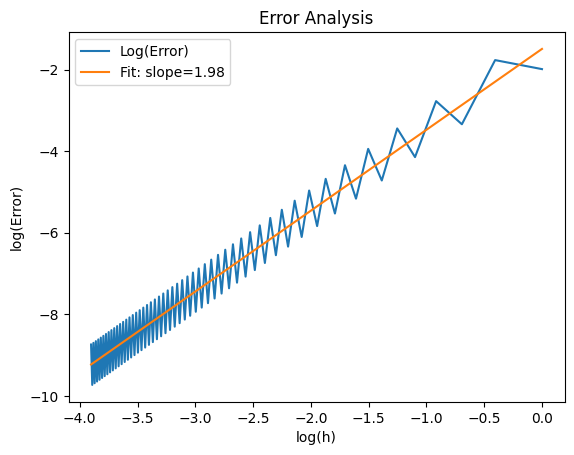

Estimated order of the method: r = 1.98


In [ ]:
def f(x):
    """Example function to integrate."""
    return np.exp(x) * (2 - np.exp(-x))


# Example usage
a, b = -1, 1
true_value = 2 - 2 / np.e

# Compute step sizes and errors
step_sizes, errors = compute_integral_and_error(f, a, b, true_value, int_mid)

# Analyze the error
slope, intercept, log_step_sizes, log_errors = analyze_error(step_sizes, errors)

# Plot the results
plot_error_analysis(log_step_sizes, log_errors, slope, intercept)

# Display the estimated order of the method
print(f"Estimated order of the method: r = {slope:.2f}")

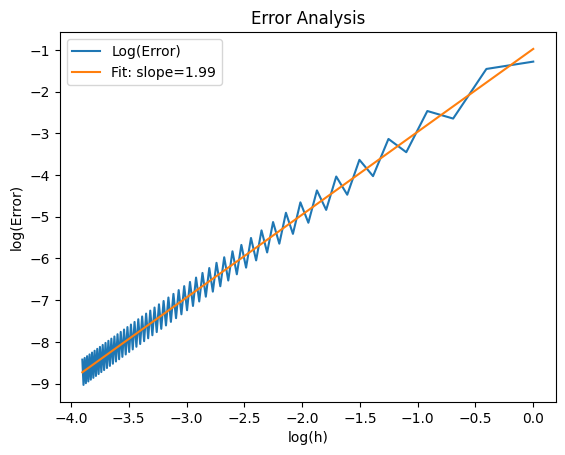

Estimated order of the method: r = 1.99


In [6]:
# Compute step sizes and errors
step_sizes, errors = compute_integral_and_error(f, a, b, true_value, int_trap)
slope, intercept, log_step_sizes, log_errors = analyze_error(step_sizes, errors)
plot_error_analysis(log_step_sizes, log_errors, slope, intercept)
print(f"Estimated order of the method: r = {slope:.2f}")

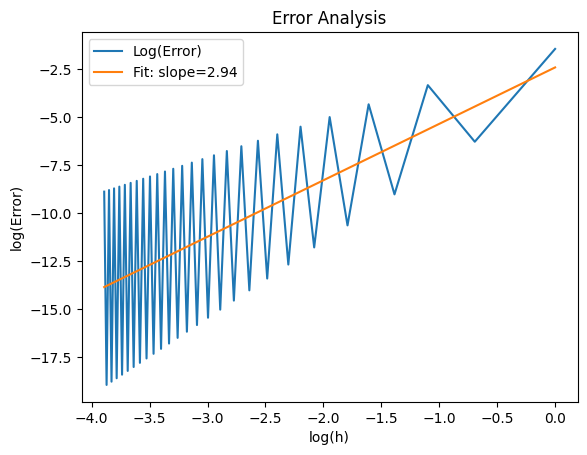

Estimated order of the method: r = 2.94


In [7]:
step_sizes, errors = compute_integral_and_error(
    f, a, b, true_value, int_simpson, step_size=2
)
slope, intercept, log_step_sizes, log_errors = analyze_error(step_sizes, errors)
plot_error_analysis(log_step_sizes, log_errors, slope, intercept)
print(f"Estimated order of the method: r = {slope:.2f}")

In [8]:
methods = [int_mid, int_trap, int_simpson]
method_names = ["Midpoint", "Trapezoidal", "Simpson"]
n = 100
for method, name in zip(methods, method_names):
    improved_integral = richardson_extrapolation(method, f, a, b, n)
    print(
        f"{name} method - Improved integral value using Richardson extrapolation: {improved_integral:.6f}"
    )

Midpoint method - Improved integral value using Richardson extrapolation: 1.264241
Trapezoidal method - Improved integral value using Richardson extrapolation: 1.264241
Simpson method - Improved integral value using Richardson extrapolation: 1.264241
